# Vector Calculus & `quiver` Plots

A lot of the vector calculus questions we will do can be computed without learning anything new. Regardless, it is good practice for the skills we have begun to develop this semester.

If you are struggling to understand how to solve the questions, please refer back to the relevant examples in previous notebooks, e.g. `Plotting.ipynb`, `Partial Derivatives.ipynb` and `Riemann Sums.ipynb`.

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

## Question 1:

(i) Attempt to symbolically plot the parametric line:

$$
\mathbf{r}(t) = \langle t, t^{2}, 1 \rangle
$$

where $t \in [0,1]$. 

What is the issue? How might this be fixed?

(ii) Numerically plot the parametric line (using `plt`).

## Answer 1 (i):

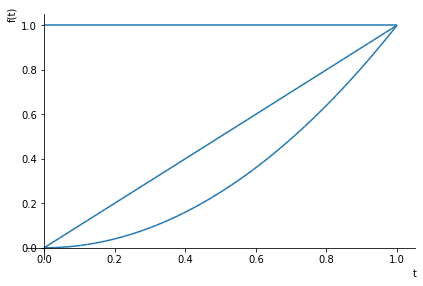

In [59]:
t = sp.Symbol('t')
sp.plot(t, t**2, 1, (t, 0, 1))

## Answer 1 (ii):

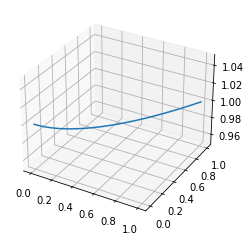

In [60]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
t = np.linspace(0, 1, 100) 
x= t
y = t**2
z = 1
ax.plot(x, y, z);

## Question 2: 

Symbolically calculate the integral:

$$
\int_{\mathcal{C}} \sqrt{z + 4x^{2}} \ dx
$$

over the paramterised curve ($\mathbf{r}$) in Question 1.

## Answer 2:

In [61]:
import sympy as sp

t = sp.Symbol('t')
x = sp.Symbol('x')
z = sp.Symbol('z')
function = (z+4*x**2)**(1/2)
function
C = sp.Curve([t, t**2], [t, 0,1])
sp.line_integrate(function, C, [x, z])

## Calculating `curl` and `divergence`

* Curl ($\nabla \times \mathbf{F}$)
* Divergence ($\nabla^2 \mathbf{F}$)

> (Note that the gradient is not included here as it takes in a scalar function and produces a vector function).

The steps are as follows:

0. Import the relevant functions `CoordSys3d`, `curl` and `divergence`.
1. Set up a coordinate system with variables $x$, $y$ and $z$ being generated by that coordinate system.
2. Create a vector field, multiplying each $\hat{i},\hat{j},\hat{k}$ by the relevant functions.
3. Pass the vector field into the functions.


### Notation

* Coordinate System: it should be a capital letter (to be consistent with existing notation). 
* Vector fields: are usually expressed with bold capital letters.

In [62]:
from sympy import Symbol, init_printing, cos, sin, Matrix, pi, exp, plot
from sympy.vector import CoordSys3D, curl, divergence, gradient, is_conservative
from sympy.plotting import plot3d
init_printing()

# Create 3D coordinate system
N = CoordSys3D('N')  
x = N.x
y = N.y
z = N.z

# Create a field.
F = N.i*(x**2-x*y) + N.j*(y**2 - x*y)

display('F is:')
display(F) # Vector Field
display('Curl of F is:')
display(curl(F)) # Vector Field
display('Divergence of F is:')
display(divergence(F)) # Scalar number
display('F is conservative:')
display(is_conservative(F)) # True or False

'F is:'

'Curl of F is:'

'Divergence of F is:'

'F is conservative:'

False

### Clarification:
Here, $x_N$ is the $x$ variable in the coordinate system, $N$.

If the $\mathbf{x_N}$ and $\mathbf{y_N}$ make it hard for you to interpret your function, you can use the `subs()` method to substitute them for a simpler symbol.

e.g.

In [63]:
F = F.subs(x, Symbol('x'))  # Make sure to reassign F equal to the substitution.
F = F.subs(y, Symbol('y'))
display(F)

## Question 3:

(i) Symbolically calculate $\mathbf{F}$.

$$
\mathbf{F} = \nabla \phi = \nabla \left( x^{2}y + x \sin\left(y\right)\right)
$$

(ii) Symbolically calculate $\nabla \times \mathbf{F}$

## Answer 3:

In [64]:
t = sp.Symbol('t')
x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')
phi  = x**2*y + x*sp.sin(y)

dfdx = sp.diff(phi, x)
dfdy = sp.diff(phi, y)
display(dfdx, dfdy)

In [65]:
F= N.i*dfdx + N.j*dfdy 
curl(F)

## Creating `quiver` plots

A `quiver` plot is simply a plot of a vector field. It displays arrows on a 2D or 3D space.

Running the below cell can give us an idea about how to use the function.

In [66]:
import matplotlib.pyplot as plt
help(plt.quiver)

Help on function quiver in module matplotlib.pyplot:

quiver(*args, data=None, **kw)
    Plot a 2D field of arrows.
    
    Call signature::
    
      quiver([X, Y], U, V, [C], **kw)
    
    *X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
    *C* optionally sets the color.
    
    **Arrow size**
    
    The default settings auto-scales the length of the arrows to a reasonable size.
    To change this behavior see the *scale* and *scale_units* parameters.
    
    **Arrow shape**
    
    The defaults give a slightly swept-back arrow; to make the head a
    triangle, make *headaxislength* the same as *headlength*. To make the
    arrow more pointed, reduce *headwidth* or increase *headlength* and
    *headaxislength*. To make the head smaller relative to the shaft,
    scale down all the head parameters. You will probably do best to leave
    minshaft alone.
    
    **Arrow outline**
    
    *linewidths* and *edgecolors* can be used to customize the

So, the `help()` function may have indicated to you that a way to use quiver is:

`quiver(X,Y,U,V)`

Where:

* `X`: Is the $x$-position of the arrow.
* `Y`: Is the $y$-position of the arrow.
* `U`: Is the $x$-direction of the arrow.
* `V`: Is the $y$-direction of the arrow.

You _can_ do 3D quiver plots, but we will be sticking to 2D.

How to do this is best crystallised by an example.

Let's plot 

$$
\mathbf{F} = -y \hat{i} + x \hat{j}
$$

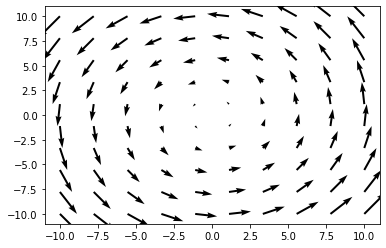

In [67]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1)
ax = fig.gca()

x_ = np.linspace(-10,10,10)
y_ = np.linspace(-10,10,10)
x, y = np.meshgrid(x_,y_)
u = -1*y
v = x
ax.quiver(x,y,u,v)

## Making `quiver` plots more interpretable

If you have too many points in your vectors, the arrows become impossibly small to see. The ends touch and you have to zoom in to see which direction they are pointing in.

Less points results in bigger arrows, which is why the `linspace` vectors above only have 10 values each.

## Adding colour to your `quiver` plots

We can pass in a fifth variable, which will associate each vector with a colour. Let's use the angle of the arrow set its colour.

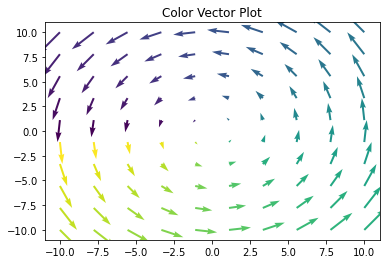

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(1)
ax = fig.gca()

x_ = np.linspace(-10,10,10)
y_ = np.linspace(-10,10,10)
x, y = np.meshgrid(x_,y_)
u = -1*y
v = x
c = np.arctan2(u,v) # Create an array of angles. Each angle is associated with a vector on the plot.
ax.quiver(x,y,u,v,c) # Pass the `c` array in as the fifth variable.
plt.title('Color Vector Plot')
plt.show()

## Question 4:

Create a plot of

(i) The surface, $\phi$

(ii) The vector field ($\mathbf{F}$) 

both as specified in Question 3.

## Answer 4:

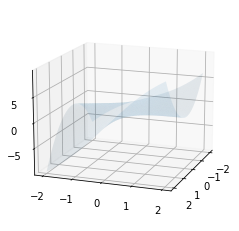

In [69]:
# phi  = x**2*y + x*sp.sin(y)

# 3D plot setup
fig = plt.figure()
ax = fig.gca(projection='3d')

# Create boundaries of f(x,y)
x = np.linspace(-2,2)
y = np.linspace(-2,2)

# Create 2D domain of f(x,y)
xf, yf = np.meshgrid(x,y)

# Discrete version of f(x,y) over 2D domain
fxy = (xf**2*yf)+(np.sin(yf) * xf) 

# Plot our function to be optimised f(x,y)
ax.plot_surface(xf, yf, fxy, alpha=0.1)
ax.view_init(15, 20)

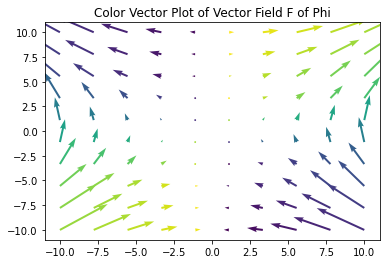

In [70]:
fig = plt.figure(1)
ax = fig.gca()

x_ = np.linspace(-10,10,10)
y_ = np.linspace(-10,10,10)
x, y = np.meshgrid(x_,y_)
# 2𝑥𝑦+sin(𝑦) 
# 𝑥2+𝑥cos(𝑦)
u = (2*x*y) + np.sin(y)
v = (x**2) + (x*np.cos(y))
c = np.arctan2(u,v) # Create an array of angles. Each angle is associated with a vector on the plot.
ax.quiver(x,y,u,v,c) # Pass the `c` array in as the fifth variable.
plt.title('Color Vector Plot of Vector Field F of Phi')
plt.show()

## Question 5:

$\mathcal{D}$ is defined as the closed region bounded by $y = \sqrt{x}$ and $y=x^2$.

Plot the region in 2D space that is occupied by $\mathcal{D}$ and symbolically integrate:

$$
\int \int_{\mathcal{D}} \left( xy + y^{2} \right) \ dA
$$

Note: You may need to think about what is the upper and lower bound first.

## Answer 5:

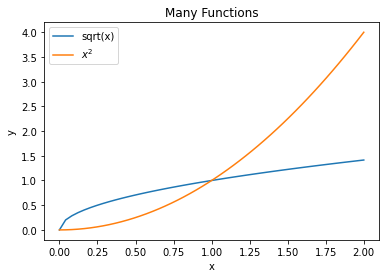

In [71]:
xv = np.linspace(0, 2, 50) # Generates 30 points between 0 and 4
yv = np.sqrt(xv)  # Vector evaluation, sqrt() is applied to each point in xv

y1v = np.sqrt(xv)
y2v = xv**2

fig, ax = plt.subplots()
ax.plot(xv, y1v,
        xv, y2v)
ax.legend(['sqrt(x)', r'$x^2$', ], loc = 'best')
ax.set_title('Many Functions')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [72]:
import sympy as sp

x = sp.Symbol('x')
y = sp.Symbol('y')
function = (x*y) + (y**2)
res = sp.integrate(function, (y, x**2, sp.sqrt(x)), (x, 0, 1))
res